# Problem Statement:
Financial threats are displaying a trend about the credit risk of commercial banks as the
incredible improvement in the financial industry has arisen. In this way, one of the
biggest threats faces by commercial banks is the risk prediction of credit clients. The
goal is to predict the probability of credit default based on credit card owner's
characteristics and payment history.

In [1]:
#import necessary libraries

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error 

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
#read data from csv into a csv file

In [10]:
df1=pd.read_csv("data/UCI_Credit_Card.csv")

In [11]:
#shape of the dat
df1.shape

(30000, 25)

Copy this dataset df1 into another df dataframe which will be used for all further computations.

In [12]:
df=df1.copy() #preserve original data

In [13]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


we can see that all the 25 columns have 30000 count which indicates there is no missing value.
we can see that the repayment status is indicated in columns PAY_0, PAY_2 ... with no PAY_1 column, so we rename PAY_0 to PAY_1 for ease of understanding. 

In [15]:
df.rename(columns={'default.payment.next.month':'def_pay'}, inplace=True)
df.rename(columns={'PAY_0':'PAY_1'}, inplace=True)

In [16]:
df.sample(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
11627,11628,150000.0,2,1,2,27,-1,-1,-1,0,...,2924.0,0.0,0.0,3.0,3461.0,261.0,0.0,0.0,0.0,0
1254,1255,290000.0,1,1,1,46,0,0,0,0,...,87700.0,88621.0,53243.0,10744.0,6000.0,1573.0,1629.0,3129.0,105423.0,0
10578,10579,70000.0,2,1,2,25,0,0,0,0,...,70146.0,71592.0,66053.0,2519.0,2371.0,2544.0,3000.0,1866.0,1266.0,0
8708,8709,100000.0,1,2,2,29,1,3,3,2,...,96287.0,102069.0,81931.0,4000.0,0.0,0.0,7629.0,0.0,18895.0,1
9972,9973,300000.0,2,1,2,39,-1,-1,-2,-2,...,-1.0,-1.0,-1.0,1.0,0.0,0.0,0.0,0.0,2774.0,1


Check the datatype of each variable of dataset. 

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         30000 non-null  int64  
 1   LIMIT_BAL  30000 non-null  float64
 2   SEX        30000 non-null  int64  
 3   EDUCATION  30000 non-null  int64  
 4   MARRIAGE   30000 non-null  int64  
 5   AGE        30000 non-null  int64  
 6   PAY_1      30000 non-null  int64  
 7   PAY_2      30000 non-null  int64  
 8   PAY_3      30000 non-null  int64  
 9   PAY_4      30000 non-null  int64  
 10  PAY_5      30000 non-null  int64  
 11  PAY_6      30000 non-null  int64  
 12  BILL_AMT1  30000 non-null  float64
 13  BILL_AMT2  30000 non-null  float64
 14  BILL_AMT3  30000 non-null  float64
 15  BILL_AMT4  30000 non-null  float64
 16  BILL_AMT5  30000 non-null  float64
 17  BILL_AMT6  30000 non-null  float64
 18  PAY_AMT1   30000 non-null  float64
 19  PAY_AMT2   30000 non-null  float64
 20  PAY_AM

We see that all the columns are int64, float64 type whereas from previous knowledge we know that SEX, EDUCATION, MARRIAGE, PAY_1, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6, def_pay are categorical features.
So we have to convert these features in categorical

In [18]:
df.isna().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
def_pay      0
dtype: int64

no missing value hence no imputation, now we directly move towards visualzation of df dataset

before moving to visualization we first select some features which we feel would be most correlated to the target variable. From the data provided we see that we want to predict whether a person will default in payment next month or not. This prediction depends mostly on previous repayment history, what is the limiting balance, age, education and marriage. Let's plot these first.

In [19]:
#this will store the count percentage of def_pay in df_count
df_count=(df.def_pay.value_counts(normalize=True)*100)


In [20]:
df_count

0    77.88
1    22.12
Name: def_pay, dtype: float64

In [21]:
import matplotlib.pyplot as plt 

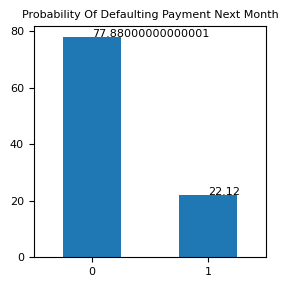

In [22]:
df_count.plot.bar(figsize=(3,3))
plt.xticks(fontsize=8, rotation=0)
plt.yticks(fontsize=8)
plt.title("Probability Of Defaulting Payment Next Month", fontsize=8)

for x,y in zip([0,1],df_count):
    plt.text(x,y,y,fontsize=8)
plt.show()

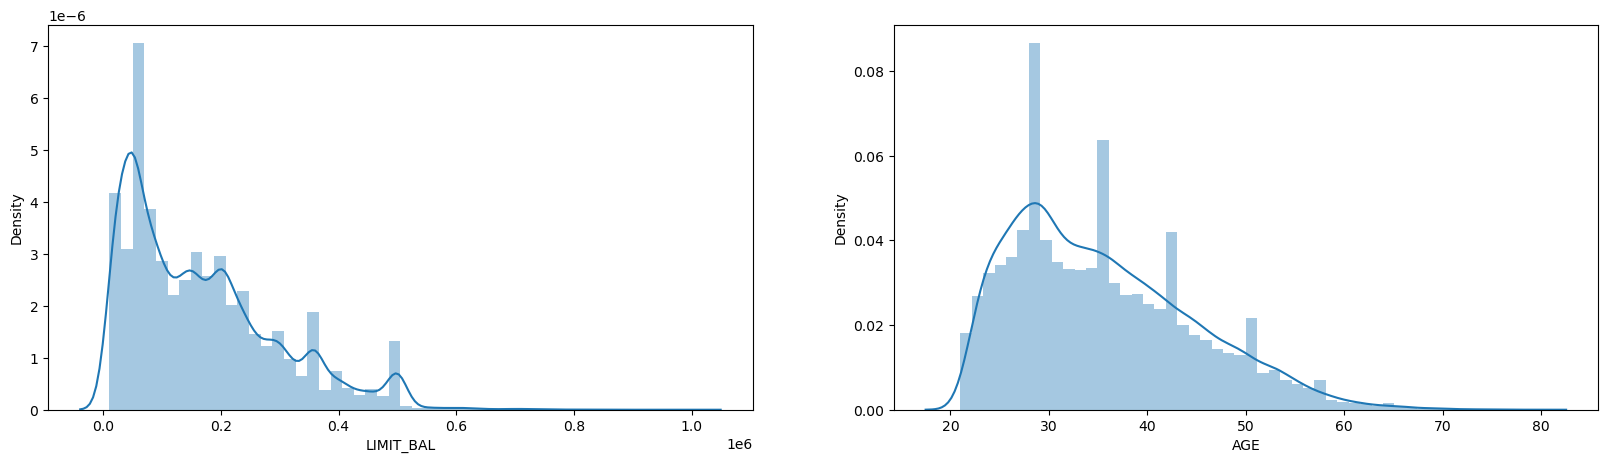

In [23]:
import seaborn as sns
plt.subplots(figsize=(20,5))
plt.subplot(121)
sns.distplot(df.LIMIT_BAL)

plt.subplot(122)
sns.distplot(df.AGE)

plt.show()

We can see that the dataset consists of 77% clients are not expected to default payment whereas 23% clients are expected to default the payment.

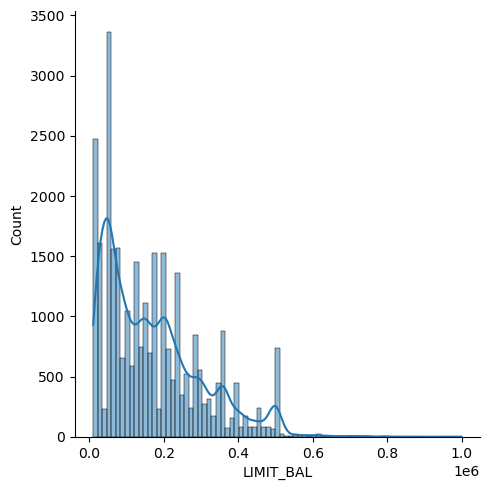

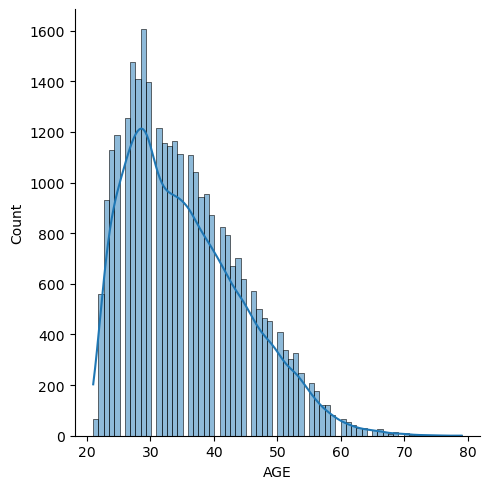

In [24]:

sns.displot(df.LIMIT_BAL,kde=True)
sns.displot(df.AGE,kde=True)

plt.show()

By plotting the continous variables we observe that dataset consists of skewed data of limiting balance and age of clients.
We have more number of clients having limiting balance between 0 to 200000 currency.
We have more number of clients from age bracket of 20 to 40, i.e., clients from mostly young to mid aged groups.

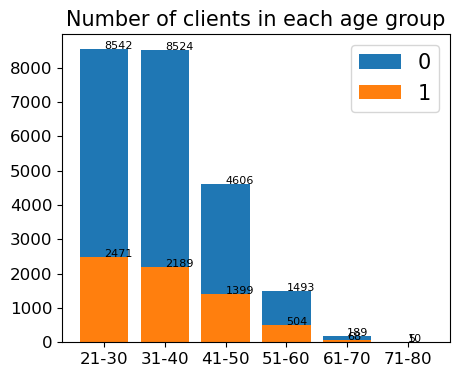

In [25]:
bins = [20,30,40,50,60,70,80]
names = ['21-30','31-40','41-50','51-60','61-70','71-80']
df['AGE_BIN'] = pd.cut(x=df.AGE, bins=bins, labels=names, right=True)

age_cnt = df.AGE_BIN.value_counts()
age_0 = (df.AGE_BIN[df['def_pay'] == 0].value_counts())
age_1 = (df.AGE_BIN[df['def_pay'] == 1].value_counts())

plt.subplots(figsize=(5,4))

plt.bar(age_0.index, age_0.values, label='0')
plt.bar(age_1.index, age_1.values, label='1')
for x,y in zip(names,age_0):
    plt.text(x,y,y,fontsize=8)
for x,y in zip(names,age_1):
    plt.text(x,y,y,fontsize=8)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Number of clients in each age group", fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()

In [26]:
df.AGE_BIN[df['def_pay'] == 0].value_counts()

21-30    8542
31-40    8524
41-50    4606
51-60    1493
61-70     189
71-80      10
Name: AGE_BIN, dtype: int64

In [27]:
df.AGE_BIN[df['def_pay'] == 1].value_counts()

21-30    2471
31-40    2189
41-50    1399
51-60     504
61-70      68
71-80       5
Name: AGE_BIN, dtype: int64

In [28]:
df.AGE_BIN.value_counts()

21-30    11013
31-40    10713
41-50     6005
51-60     1997
61-70      257
71-80       15
Name: AGE_BIN, dtype: int64

We have maximum clients from 21-30 age group followed by 31-40. Hence with increasing age group the number of clients that will default the payment next month is decreasing. Hence we can see that Age is important feature to predict the default payment for next month.

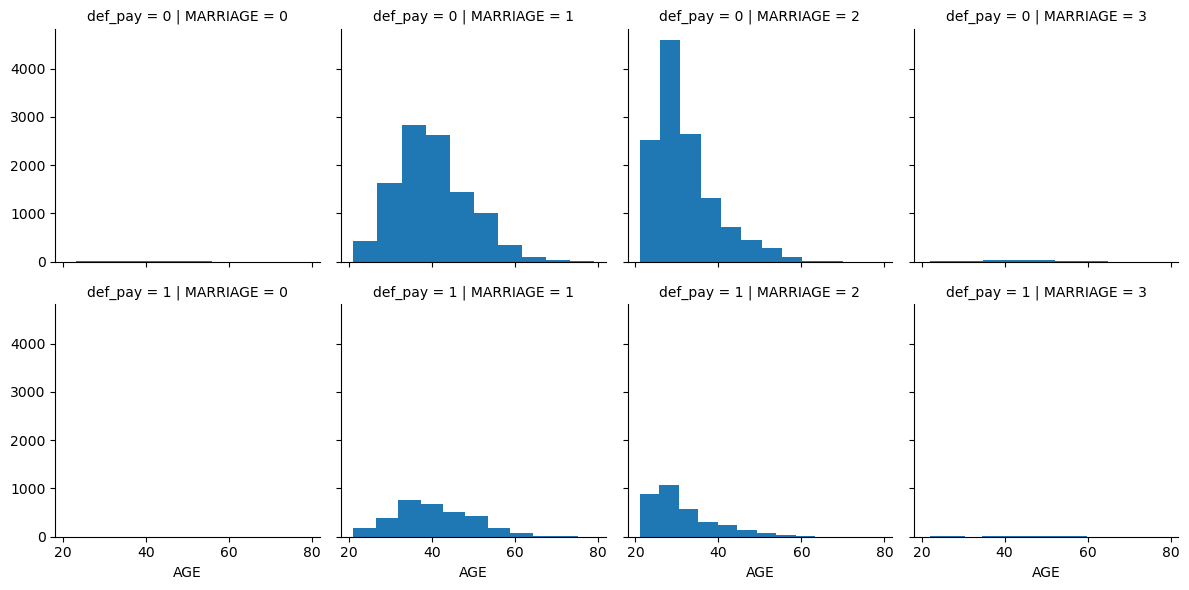

In [29]:
g = sns.FacetGrid(df, row='def_pay', col='MARRIAGE')
g = g.map(plt.hist, 'AGE')
plt.show()

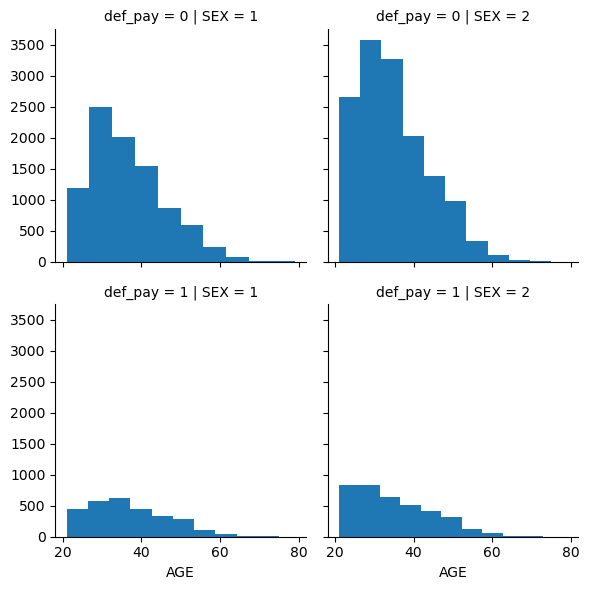

In [30]:
g = sns.FacetGrid(df, row='def_pay', col='SEX')
g = g.map(plt.hist, 'AGE')

It can be seen that females of age group 20-30 have very high tendency to default payment compared to males in all age brackets. Hence we can keep the SEX column of clients to predict probability of defaulting payment.

now we will check if the past six months bill amount will affect the payment default next month or not:

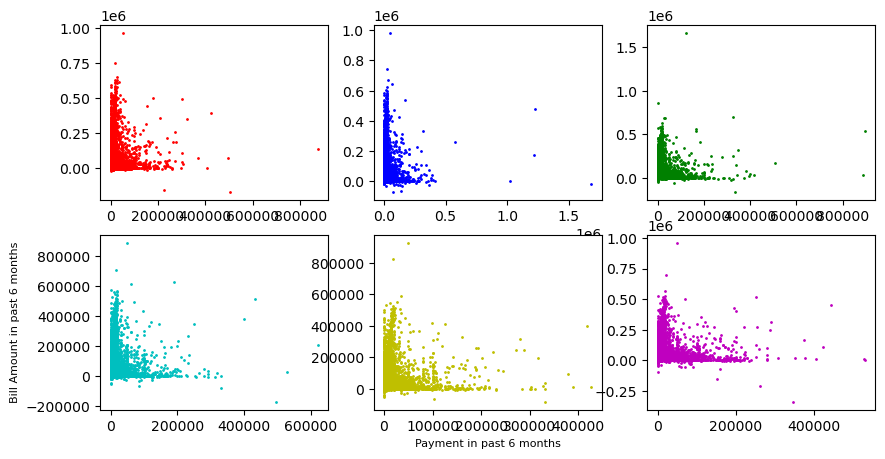

In [31]:
plt.subplots(figsize=(10,5))

plt.subplot(231)
plt.scatter(x=df.PAY_AMT1, y=df.BILL_AMT1, c='r', s=1)

plt.subplot(232)
plt.scatter(x=df.PAY_AMT2, y=df.BILL_AMT2, c='b', s=1)

plt.subplot(233)
plt.scatter(x=df.PAY_AMT3, y=df.BILL_AMT3, c='g', s=1)

plt.subplot(234)
plt.scatter(x=df.PAY_AMT4, y=df.BILL_AMT4, c='c', s=1)
plt.ylabel("Bill Amount in past 6 months", fontsize=8)

plt.subplot(235)
plt.scatter(x=df.PAY_AMT5, y=df.BILL_AMT5, c='y', s=1)
plt.xlabel("Payment in past 6 months", fontsize=8)

plt.subplot(236)
plt.scatter(x=df.PAY_AMT6, y=df.BILL_AMT6, c='m', s=1)

plt.show()


Above plot indicates that there is higher proportion of clients for whom the bill amount is high but payment done against the same is very low. This we can infer since maximum number of datapoints are closely packed along the Y-axis near to 0 on X-axis

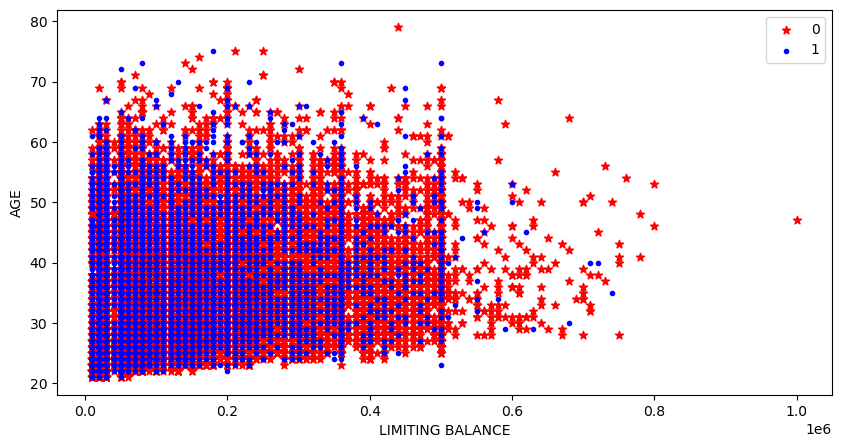

In [32]:
y1 = df.AGE[df["def_pay"] == 0]
y2 = df.AGE[df["def_pay"] == 1]
x1 = df.LIMIT_BAL[df["def_pay"] == 0]
x2 = df.LIMIT_BAL[df["def_pay"] == 1]

fig,ax = plt.subplots(figsize=(10,5))
plt.scatter(x1,y1, color="r", marker="*", label='0')
plt.scatter(x2,y2, color="b", marker=".", label='1')
plt.xlabel("LIMITING BALANCE", fontsize=10)
plt.ylabel("AGE", fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc='upper right', fontsize=10)
plt.show()

Above plot of Age against limiting balance does not provide any accurate information, as there is mixed variation of clients of all age groups and their current month limiting balance.

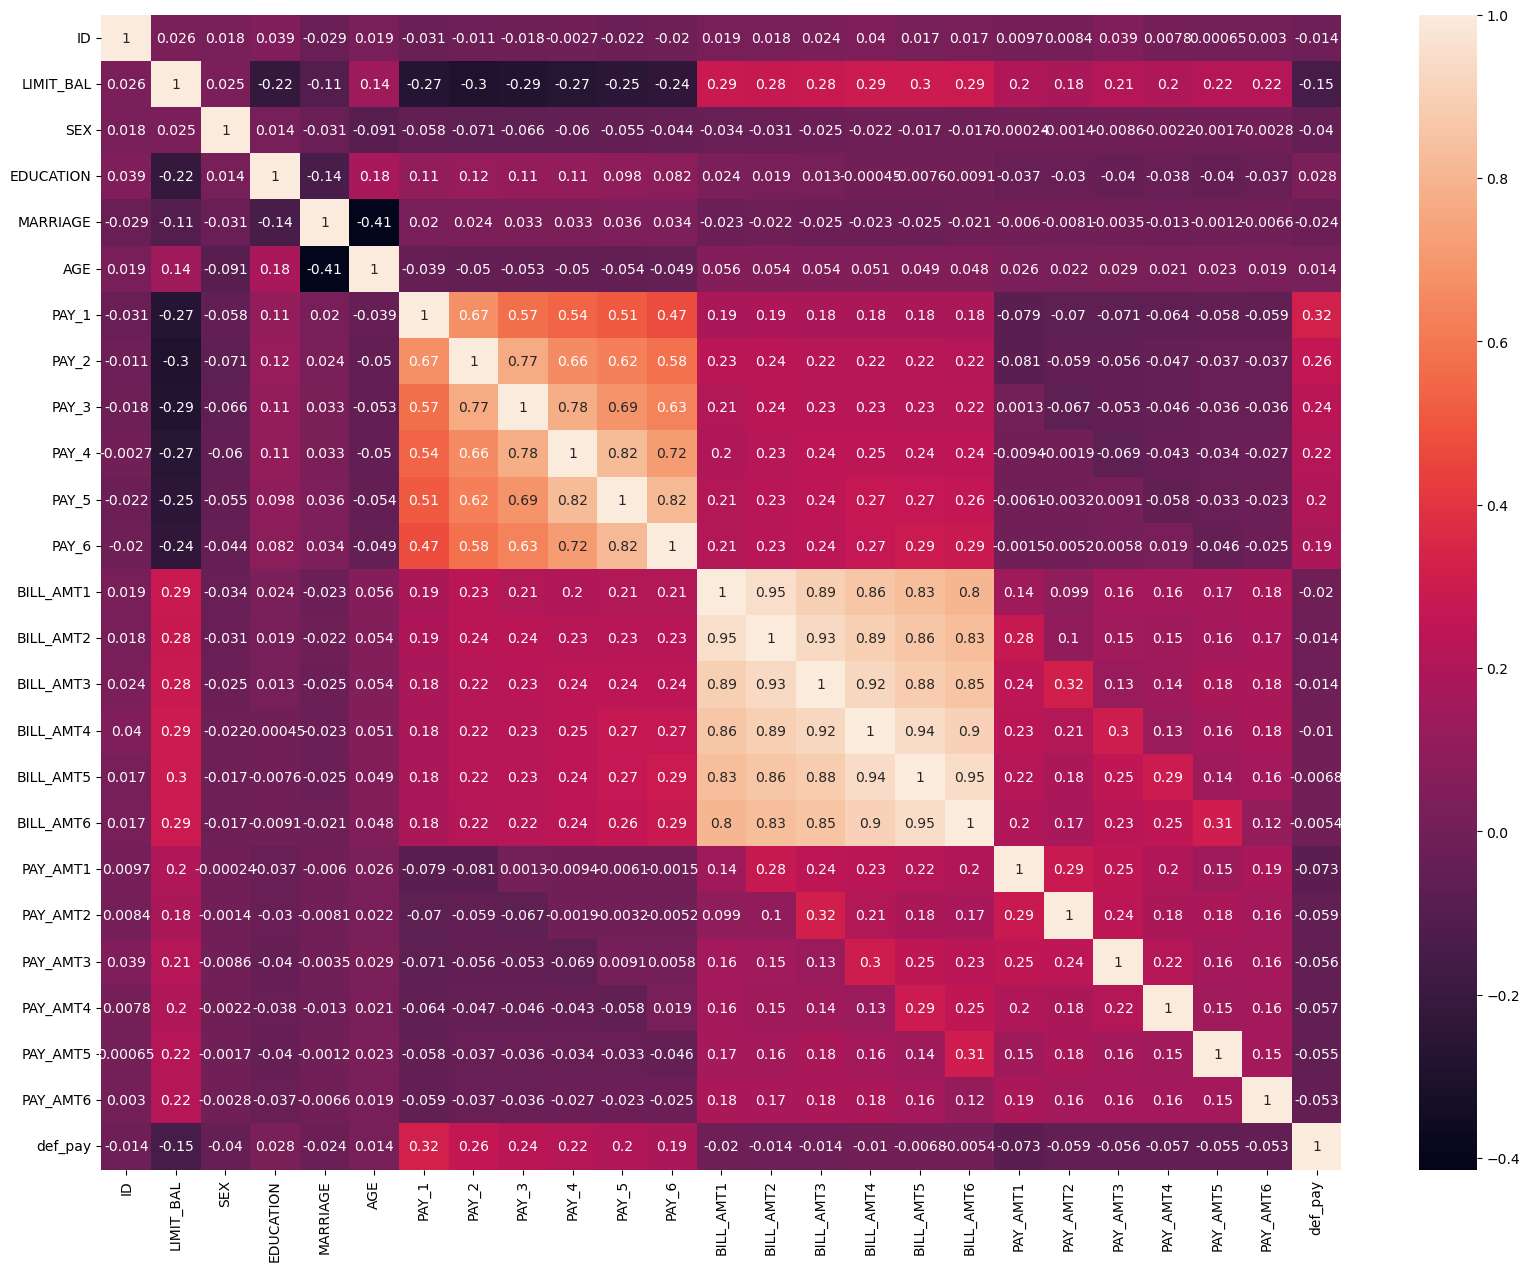

In [33]:
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(), annot=True)
plt.show()

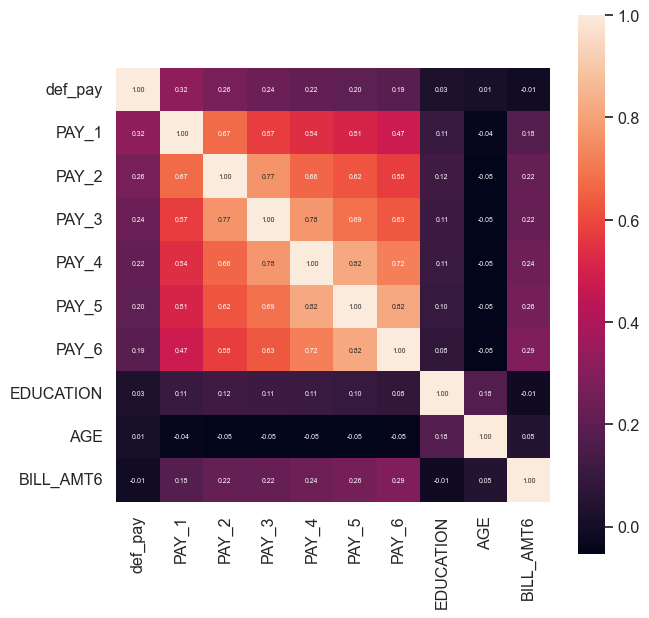

In [34]:
k = 10 #number of variables for heatmap
corrmat = df.corr()
cols = corrmat.nlargest(k, 'def_pay')['def_pay'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.05)
plt.subplots(figsize=(7,7))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 5}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

as we can see that next month default prediction is dependent on repayment status of past six months of all the features given to us. But there is multicollinearity between the Repayment Status features.

We will first train model wil all the features and try reducing the non-important features.

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   ID         30000 non-null  int64   
 1   LIMIT_BAL  30000 non-null  float64 
 2   SEX        30000 non-null  int64   
 3   EDUCATION  30000 non-null  int64   
 4   MARRIAGE   30000 non-null  int64   
 5   AGE        30000 non-null  int64   
 6   PAY_1      30000 non-null  int64   
 7   PAY_2      30000 non-null  int64   
 8   PAY_3      30000 non-null  int64   
 9   PAY_4      30000 non-null  int64   
 10  PAY_5      30000 non-null  int64   
 11  PAY_6      30000 non-null  int64   
 12  BILL_AMT1  30000 non-null  float64 
 13  BILL_AMT2  30000 non-null  float64 
 14  BILL_AMT3  30000 non-null  float64 
 15  BILL_AMT4  30000 non-null  float64 
 16  BILL_AMT5  30000 non-null  float64 
 17  BILL_AMT6  30000 non-null  float64 
 18  PAY_AMT1   30000 non-null  float64 
 19  PAY_AMT2   30000 non-null

In [36]:
from sklearn.linear_model import LogisticRegression , RidgeClassifier
from sklearn.metrics import classification_report

In [37]:
df_X = df.drop(['def_pay','AGE_BIN'], axis=1)
df_y = df.def_pay

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=10)

model1 = LogisticRegression()
model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nAccuracy Score for model1: ', accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88      5998
           1       0.00      0.00      0.00         2

    accuracy                           0.78      6000
   macro avg       0.50      0.39      0.44      6000
weighted avg       1.00      0.78      0.88      6000

[[4681 1317]
 [   2    0]]

Accuracy Score for model1:  0.7801666666666667


We can see that All the examples are predicted to be negative to default payment next month with 77.7% accuracy whereas in the dataset we have 980 observations that are expected to default payment.
After doing various random sampling by changing the random_date parameter, we found random_state=10 to be giving highest accuracy for our model1

Lets now try changing the datatypes of categorical variables from int to category

In [38]:
# change the datatype of categorical features from integer to category
df.SEX = df.SEX.astype("category")
df.EDUCATION = df.EDUCATION.astype("category")
df.MARRIAGE = df.MARRIAGE.astype("category")
df.PAY_1 = df.PAY_1.astype("category")
df.PAY_2 = df.PAY_2.astype("category")
df.PAY_3 = df.PAY_3.astype("category")
df.PAY_4 = df.PAY_4.astype("category")
df.PAY_5 = df.PAY_5.astype("category")
df.PAY_6 = df.PAY_6.astype("category")
df.def_type = df.def_pay.astype("category")

In [39]:
df_X = df.drop(['def_pay','AGE_BIN'], axis=1)
df_y = df.def_pay

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=10)

model2 = LogisticRegression()
model2.fit(X_train, y_train)

y_pred = model2.predict(X_test)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nAccuracy Score for model2: ', accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88      5998
           1       0.00      0.00      0.00         2

    accuracy                           0.78      6000
   macro avg       0.50      0.39      0.44      6000
weighted avg       1.00      0.78      0.88      6000

[[4681 1317]
 [   2    0]]

Accuracy Score for model2:  0.7801666666666667


Even after changing the datatype of certain variables there is no change if accuracy of the model.

So we evaluate now by dropping the multicollinearity variables and keeping only PAY_1 variable.

In [40]:
df_X = df.drop(['def_pay','AGE_BIN','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'], axis=1)
df_y = df.def_pay

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=10)

model3 = LogisticRegression()
model3.fit(X_train, y_train)

y_pred = model3.predict(X_test)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nAccuracy Score for model3: ', accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88      5998
           1       0.00      0.00      0.00         2

    accuracy                           0.78      6000
   macro avg       0.50      0.39      0.44      6000
weighted avg       1.00      0.78      0.88      6000

[[4681 1317]
 [   2    0]]

Accuracy Score for model3:  0.7801666666666667


As we can see even now the accuracy does not change

In [41]:
df_X = df[['SEX','MARRIAGE','AGE','BILL_AMT1','EDUCATION','PAY_1']]
df_y = df.def_pay

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.1, random_state=20)

model4 = LogisticRegression()
model4.fit(X_train, y_train)

y_pred = model4.predict(X_test)
y_train_pred = model4.predict(X_train)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nTest Accuracy Score for model4: ', accuracy_score(y_pred,y_test))
print('\nTrain Accuracy Score for model4: ', accuracy_score(y_train_pred,y_train))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88      3000
           1       0.00      0.00      0.00         0

    accuracy                           0.78      3000
   macro avg       0.50      0.39      0.44      3000
weighted avg       1.00      0.78      0.88      3000

[[2334  666]
 [   0    0]]

Test Accuracy Score for model4:  0.778

Train Accuracy Score for model4:  0.7788888888888889


We can see that by removing the unimportant and multicollinear data, the accuracy has marginally increased by more than 2%

In [42]:
df_X = df[['SEX','MARRIAGE','AGE','BILL_AMT1','EDUCATION','PAY_1']]
df_y = df.def_pay

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=20)

model5 = RidgeClassifier()
model5.fit(X_train, y_train)

y_pred = model5.predict(X_test)
y_train_pred = model5.predict(X_train)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nTest Accuracy Score for model5: ', accuracy_score(y_pred,y_test))
print('\nTrain Accuracy Score for model5: ', accuracy_score(y_train_pred,y_train))

              precision    recall  f1-score   support

           0       0.99      0.79      0.88      8694
           1       0.11      0.70      0.18       306

    accuracy                           0.79      9000
   macro avg       0.55      0.75      0.53      9000
weighted avg       0.96      0.79      0.86      9000

[[6910 1784]
 [  93  213]]

Test Accuracy Score for model5:  0.7914444444444444

Train Accuracy Score for model5:  0.7915238095238095


# Statistical Hypothesis Testing

In [43]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import normaltest
from scipy.stats import friedmanchisquare
from scipy.stats import norm
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

In [44]:
df=df1.copy() #preserve original data

Chi Independency Test
The Chi-Squared test is a statistical hypothesis test that assumes (the null hypothesis) that the observed frequencies for a categorical variable match the expected frequencies for the categorical variable.

Ho: Variables are independent
H1: Variables are dependent

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [46]:
df["EDUCATION"].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [47]:
#renaming columns for convenience

df.rename(columns={'default.payment.next.month':'def_pay','PAY_0':'PAY_1'},inplace=True)

#EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others)

fil = (df['EDUCATION'] == 5) | (df['EDUCATION'] == 6) | (df['EDUCATION'] == 0)
df.loc[fil, 'EDUCATION'] = 4
df['EDUCATION'].value_counts()

# MARRIAGE: Marital status (1=married, 2=single, 3=others)

df.loc[df['MARRIAGE']==0, 'MARRIAGE'] = 3
df['MARRIAGE'].value_counts()

"""REPAYMENT STATUS: (0=pay duly, 1=payment delay for one month, 2=payment delay for two 
   months, … 8=payment delay for eight months, 9=payment delay for nine months and above)"""

for i in range(1,7):
    col='PAY_'+str(i)
    fil = (df[col] == -2) | (df[col] == -1) 
    df.loc[fil, col] = 0
    
    
"""Very people have LIMIT_BAL greater then 500000.0 around 100, there we will take only
   those instances where LIMIT_BAL is lower then or equal to 500000.0."""

df=df[df["LIMIT_BAL"]<=500000.0]


In [48]:
df["EDUCATION"].value_counts()

2    13970
1    10468
3     4893
4      463
Name: EDUCATION, dtype: int64

In [49]:
df["MARRIAGE"].value_counts()

2    15859
1    13558
3      377
Name: MARRIAGE, dtype: int64

In [50]:
variables=['SEX','EDUCATION','MARRIAGE']
indexs={'SEX':["Male","Female"],
       'EDUCATION':["Graduate School","University","High School","Others"],
       'MARRIAGE':["Married","Single","Others"]}

for var in variables:
    inter=df.groupby(var)[["def_pay"]].agg(['sum','count'])
    default=inter['def_pay']['sum'].values
    Non_default=(inter['def_pay']['count']-inter['def_pay']['sum']).values
    
    contingency_table=pd.DataFrame({"Non-defaulter":Non_default,
                                    "Defaulter":default},
                                    index=indexs[var])
    
    stat, p, dof, expected = chi2_contingency(contingency_table)
    
    expected_table=pd.DataFrame(expected,columns=["Non-defaulter","Defaulter"],
                            index=indexs[var])
    
    print(var,'\n\nObserved Table\n',contingency_table,'\n\nExpected Table\n',expected_table)
    
    # interpret test-statistic
    prob = 0.95
    critical = chi2.ppf(prob, dof)
    print('\nProbability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
    if abs(stat) >= critical:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')
        
    # interpret p-value
    alpha = 1.0 - prob
    print('\nSignificance=%.3f, p=%.3f' % (alpha, p))
    if p <= alpha:
        print('Dependent (reject H0 null hypothesis)')
    else:
        print('Independent (fail to reject H0 null hypothesis)')
    print("\n","*"*50)

SEX 

Observed Table
         Non-defaulter  Defaulter
Male             8935       2864
Female          14246       3749 

Expected Table
         Non-defaulter    Defaulter
Male      9180.124153  2618.875847
Female   14000.875847  3994.124153

Probability=0.950, critical=3.841, stat=48.625
Dependent (reject H0)

Significance=0.050, p=0.000
Dependent (reject H0 null hypothesis)

 **************************************************
EDUCATION 

Observed Table
                  Non-defaulter  Defaulter
Graduate School           8441       2027
University               10650       3320
High School               3659       1234
Others                     431         32 

Expected Table
                  Non-defaulter    Defaulter
Graduate School    8144.549507  2323.450493
University        10869.254548  3100.745452
High School        3806.962241  1086.037759
Others              360.233705   102.766295

Probability=0.950, critical=7.815, stat=157.083
Dependent (reject H0)

Significance=0.050